## POE5 Chapter 5 Codes

### POE5 Example 5.1 Data for Hamburger Chain

In [1]:
%config InlineBackend.figure_format = "retina"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid',  {"grid.color": '.95'})
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
poe5csv = 'http://principlesofeconometrics.com/poe5/data/csv/'
andy = pd.read_csv(poe5csv+'andy.csv')

print(andy.head())

   sales  price  advert
0   73.2   5.69     1.3
1   71.8   6.49     2.9
2   62.4   5.63     0.8
3   67.4   6.22     0.7
4   89.3   5.02     1.5


In [3]:
print(andy.tail(3))

    sales  price  advert
72   75.4   5.71     0.7
73   81.3   5.45     2.0
74   75.0   6.05     2.2


In [4]:
pd.set_option("display.precision", 4)
print(andy.describe())

         sales    price   advert
count  75.0000  75.0000  75.0000
mean   77.3747   5.6872   1.8440
std     6.4885   0.5184   0.8317
min    62.4000   4.8300   0.5000
25%    73.2000   5.2200   1.1000
50%    76.5000   5.6900   1.8000
75%    82.2000   6.2100   2.7000
max    91.2000   6.4900   3.1000


In [5]:
print(f"Price mean:     {andy.price.mean():.4f}")
print(f"Price std dev:  {andy.price.std():.4f}")
print(f"Price variance: {andy.price.var():.4f}")
print(f"Price skewness: {st.skew(andy.price):.4f}")
print(f"Price kurtosis: {st.kurtosis(andy.price,fisher=False):.4f}")

Price mean:     5.6872
Price std dev:  0.5184
Price variance: 0.2688
Price skewness: 0.0618
Price kurtosis: 1.6672


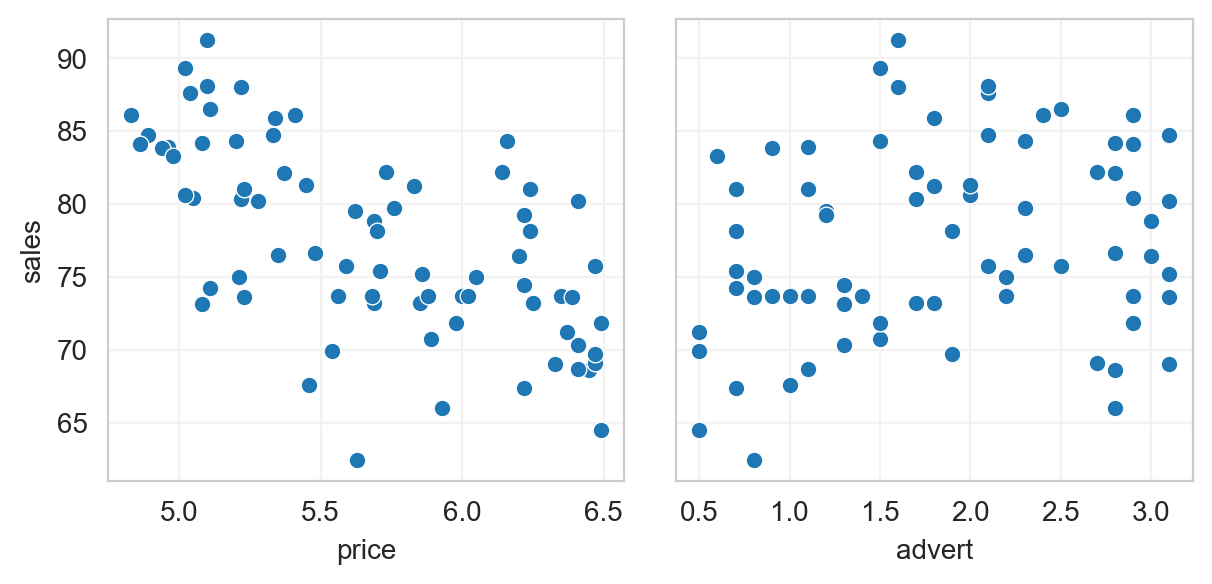

In [6]:
fig, ax = plt.subplots(1,2,figsize=(7,3))
sns.scatterplot(x=andy.price,y=andy.sales,ax=ax[0])
sns.scatterplot(x=andy.advert,y=andy.sales,ax=ax[1])
ax[1].set(ylabel=None,yticklabels=[]);
plt.subplots_adjust(wspace=0.1)

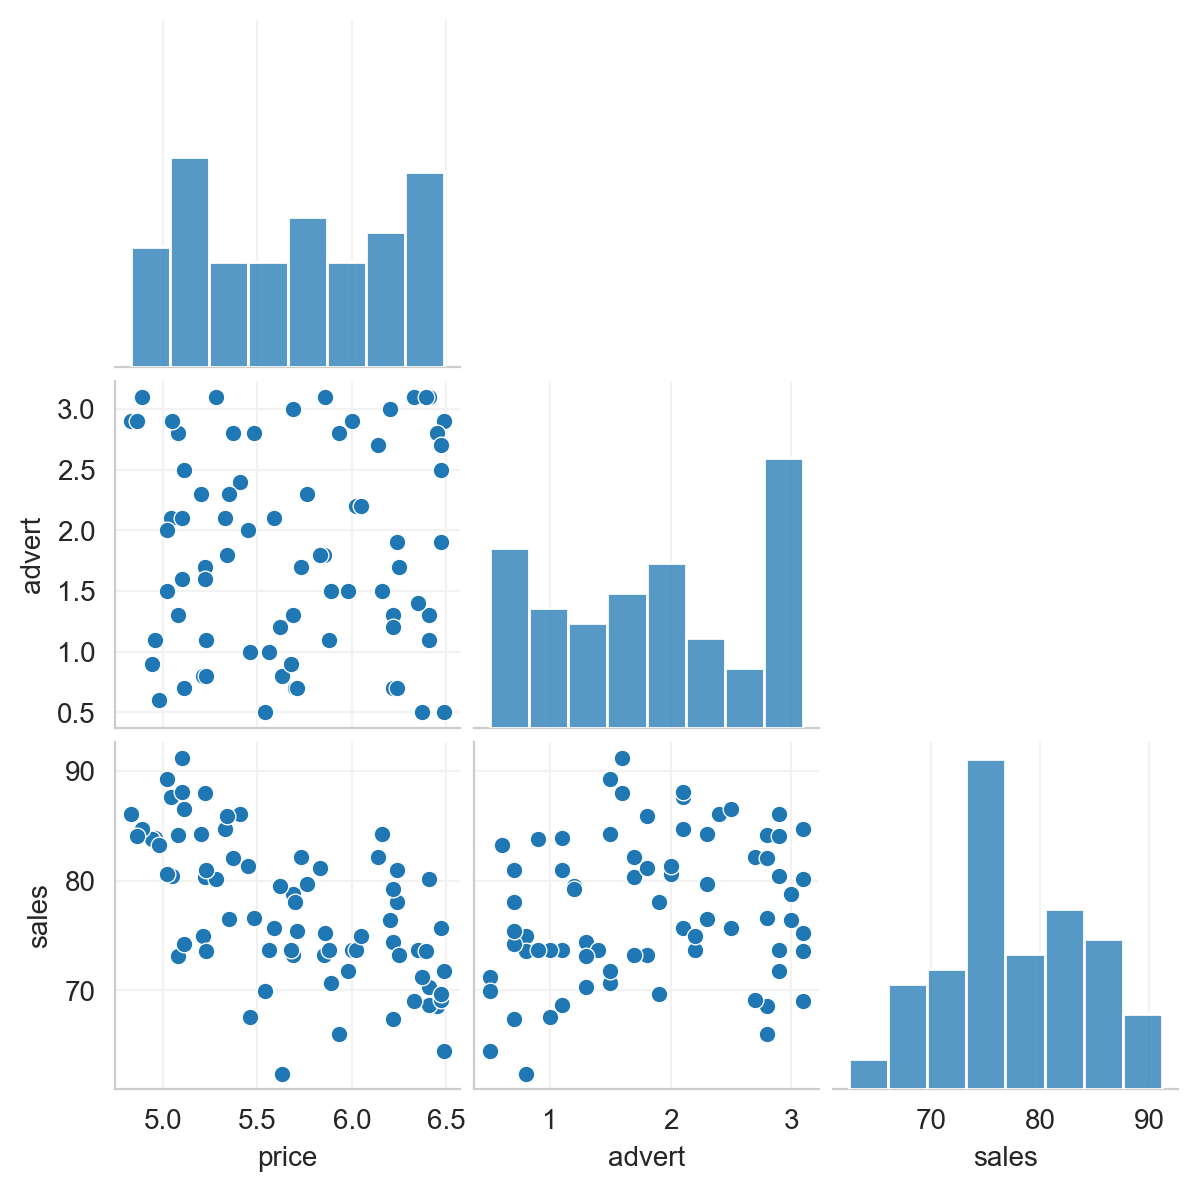

In [7]:
sns.pairplot(andy,vars=['price','advert','sales'],corner=True,height=2);

In [8]:
res = smf.ols(formula='sales ~ price + advert',data=andy).fit()

print(res.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.433
No. Observations:                  75   F-statistic:                     29.25
Covariance Type:            nonrobust   Prob (F-statistic):           5.04e-10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    118.9136      6.352     18.722      0.000     106.252     131.575
price         -7.9079      1.096     -7.215      0.000     -10.093      -5.723
advert         1.8626      0.683      2.726      0.008       0.501       3.225

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [9]:
def predicted(price,advert):
    return res.params.Intercept + res.params.price*price \
          + res.params.advert*advert

price = 5.50
advert = 1.2

print(f"Predicted sales (thousands): = {predicted(price,advert):.2f}")

Predicted sales (thousands): = 77.66


In [10]:
new_data = pd.DataFrame({'price':[5.5],'advert':[1.2]})
pred_res = res.get_prediction(exog=new_data)
yhat = pred_res.predicted_mean[0]
se = pred_res.se_mean[0]
ci95 = pred_res.conf_int()[0]
print(f"Predicted sales (thousands): {yhat:.2f} +- {se:.2f}")
print(f"95% C.I. = ({ci95[0]:.5f}, {ci95[1]:.5f})")

Predicted sales (thousands): 77.66 +- 0.74
95% C.I. = (76.17815, 79.13288)


In [11]:
andy['price_star'] = andy.price*100
andy['sales_star'] = andy.sales*1000

res2 = smf.ols(formula='sales_star ~ price_star + advert',data=andy).fit()

print(res2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.189e+05   6351.638     18.722      0.000    1.06e+05    1.32e+05
price_star   -79.0785     10.960     -7.215      0.000    -100.927     -57.230
advert      1862.5843    683.195      2.726      0.008     500.659    3224.510


In [12]:
print(f"Estimated Variance = {res.scale:.6f}")
print(f"Estimated Std. Dev. = {np.sqrt(res.scale):.6f}")

Estimated Variance = 23.874207
Estimated Std. Dev. = 4.886124


In [13]:
sighat_squared = res.ssr / res.df_resid
print(f"Estimated Variance = {sighat_squared:.6f}")
print(f"Estimated Std. Dev. = {np.sqrt(sighat_squared):.6f}")

Estimated Variance = 23.874207
Estimated Std. Dev. = 4.886124


In [14]:
print(f"R-squared = {res.rsquared:.6f}")
print(f"Adj. R-squared = {res.rsquared_adj:.6f}")

R-squared = 0.448258
Adj. R-squared = 0.432932


In [15]:
andy['sales_resid'] = smf.ols('sales ~ price',data=andy).fit().resid
andy['advert_resid'] = smf.ols('advert ~ price',data=andy).fit().resid

res_fwl = smf.ols('sales_resid ~ advert_resid - 1',data=andy).fit()

print(res_fwl.summary().tables[1])

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
advert_resid     1.8626      0.674      2.764      0.007       0.520       3.205


In [16]:
cov_matrix = res.cov_params()
print(cov_matrix)

           Intercept   price  advert
Intercept    40.3433 -6.7951 -0.7484
price        -6.7951  1.2012 -0.0197
advert       -0.7484 -0.0197  0.4668


In [17]:
print(res.bse)

Intercept    6.3516
price        1.0960
advert       0.6832
dtype: float64


In [18]:
print(f"se(price) = {res.bse.price:.4f}")

se(price) = 1.0960


In [21]:
tc72 = st.t.ppf(1-0.025,72)
print(f"t(72) .025 critical value = {tc72:.3f}")

bL = res.params.price - tc72 * res.bse.price
bU = res.params.price + tc72 * res.bse.price
print(f"Price C.I. bounds: ({bL:.5f}, {bU:.5f})")

t(72) .025 critical value = 1.993
Price C.I. bounds: (-10.09268, -5.72303)


In [20]:
bL = res.params.advert - tc72 * res.bse.advert
bU = res.params.advert + tc72 * res.bse.advert
print(f"Advert C.I. bounds: ({bL:.5f}, {bU:.5f})")

Advert C.I. bounds: (0.50066, 3.22451)


In [21]:
print(res.conf_int())  # 95% CI is the default

                  0         1
Intercept  106.2519  131.5754
price      -10.0927   -5.7230
advert       0.5007    3.2245


In [22]:
print(res.conf_int(alpha=0.01)) # 99% CI

                  0         1
Intercept  102.1081  135.7191
price      -10.8077   -5.0080
advert       0.0550    3.6702


In [23]:
bL = res.conf_int()[0].price
bU = res.conf_int()[1].price
print(f"Price C.I. bounds: ({bL:.5f}, {bU:.5f})")  

Price C.I. bounds: (-10.09268, -5.72303)


If we want to print the summary table with a different CI that 95%, we can do that.  Here we also show that we can change the title of the table, which might be useful if we are cutting/pasting into a journal article.


In [24]:
print(res.summary(alpha=0.1).tables[1])

                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
Intercept    118.9136      6.352     18.722      0.000     108.330     129.497
price         -7.9079      1.096     -7.215      0.000      -9.734      -6.082
advert         1.8626      0.683      2.726      0.008       0.724       3.001


In [25]:
hypothesis = 'price*-0.4 + advert*0.8'
print(res.t_test(hypothesis))
print(res.t_test(hypothesis).conf_int(alpha=0.1))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             4.6532      0.710      6.557      0.000       3.239       6.068
[[3.47078506 5.83563323]]


In [26]:
t1 = res.params.price/res.bse.price
print(f"t1 = {t1:.5f}")

t1 = -7.21524


In [27]:
print(f"t1 = {res.tvalues.price:.5f}")

t1 = -7.21524


In [28]:
p1 = res.pvalues.price
print(f"p1 = {p1:.5g}")

p1 = 4.424e-10


In [29]:
c1 = st.t.ppf(0.975,res.df_resid)
print(f"c1 = {c1:.5f}")

c1 = 1.99346


In [30]:
print(f"t1 = {res.tvalues.price:.5f}")
print(f"p1 = {res.pvalues.price:.5g}")
print(f"c1 = {st.t.ppf(0.975,res.df_resid):.5f}")

t1 = -7.21524
p1 = 4.424e-10
c1 = 1.99346


In [31]:
t2 = res.tvalues.advert
p2 = res.pvalues.advert
c2 = st.t.ppf(0.975,res.df_resid)
print(f"t2 = {t2:.4f}\np2 = {p2:.3e}\nc2 = {c2:.4f}")

t2 = 2.7263
p2 = 8.038e-03
c2 = 1.9935


In [32]:
t1 = res.tvalues.price
crit = st.t.ppf(0.05,res.df_resid)
pval = st.t.cdf(t1,res.df_resid)

print(f"t1   = {t1:7.4f}\ncrit = {crit:7.4f}\npval = {pval:10.3e}")

t1   = -7.2152
crit = -1.6663
pval =  2.212e-10


In [33]:
t2 = (res.params.advert-1)/res.bse.advert

crit = st.t.ppf(0.95,res.df_resid)
pval = st.t.sf(t2,res.df_resid)

print(f"t2   = {t2:7.4f}\ncrit = {crit:7.4f}\npval = {pval:7.4f}")

t2   =  1.2626
crit =  1.6663
pval =  0.1054


In [34]:
hypothesis = '-0.2*price - 0.5*advert'
t_test = res.t_test(hypothesis)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6503      0.401      1.622      0.109      -0.149       1.450


In [35]:
tval = t_test.tvalue.item(0)
crit = st.t.ppf(0.05,res.df_resid)
pval = st.t.sf(t_test.statistic,res.df_resid)
print(f"t   = {tval:7.4f}\ncrit = {crit:7.4f}\npval = {pval.item(0):7.4f}")

t   =  1.6217
crit = -1.6663
pval =  0.0546


In [36]:
andy['a2'] = andy.advert**2

res_a2 = smf.ols('sales ~ price + advert + a2',data=andy).fit()

print(res_a2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.7190      6.799     16.137      0.000      96.162     123.276
price         -7.6400      1.046     -7.304      0.000      -9.726      -5.554
advert        12.1512      3.556      3.417      0.001       5.060      19.242
a2            -2.7680      0.941     -2.943      0.004      -4.644      -0.892


In [37]:
me1 = res_a2.params.advert + 2*0.5*res_a2.params.a2
me2 = res_a2.params.advert + 2*2.0*res_a2.params.a2

print(f"me1 = {me1:.3f}\nme2 = {me2:.3f}")

me1 = 9.383
me2 = 1.079


In [38]:
cps5 = pd.read_csv(poe5csv+'cps5_small.csv')

res_cps5a = smf.ols('wage ~ educ*exper',data=cps5).fit()
print(res_cps5a.summary().tables[1])

def me(years):
    return res_cps5a.params.exper + res_cps5a.params['educ:exper']*years

print(f"Marginal effect of experience if educ =  8: {me(8):.3f}")
print(f"Marginal effect of experience if educ = 16: {me(16):.3f}")
print(f"Marginal effect of experience if educ = 20: {me(20):.3f}")

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.7593      4.162     -4.507      0.000     -26.925     -10.594
educ           2.6557      0.283      9.376      0.000       2.100       3.211
exper          0.2384      0.134      1.785      0.074      -0.024       0.500
educ:exper    -0.0027      0.009     -0.292      0.770      -0.021       0.016
Marginal effect of experience if educ =  8: 0.216
Marginal effect of experience if educ = 16: 0.194
Marginal effect of experience if educ = 20: 0.183


In [39]:
cps5['lwage'] = np.log(cps5.wage)
cps5['exper2'] = cps5.exper*cps5.exper

res_cps5b = smf.ols('lwage ~ educ*exper + exper2',data=cps5).fit()
print(res_cps5b.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6792      0.156      4.350      0.000       0.373       0.986
educ           0.1359      0.010     13.513      0.000       0.116       0.156
exper          0.0489      0.007      7.145      0.000       0.035       0.062
educ:exper    -0.0013      0.000     -3.704      0.000      -0.002      -0.001
exper2        -0.0005    7.6e-05     -6.241      0.000      -0.001      -0.000


In [40]:
def me_exp(yrs_edu,yrs_exp):
    return res_cps5b.params.exper + res_cps5b.params['educ:exper'] * yrs_edu +\
              2*res_cps5b.params.exper2*yrs_exp

def me_edu(yrs_edu,yrs_exp):
    return res_cps5b.params.educ + res_cps5b.params['educ:exper']*yrs_exp

yrs_edu = [8, 8, 16, 16]
yrs_exp = [0, 20, 0, 20]

for i in range(len(yrs_edu)):
    print(f"me_exp(wage|{yrs_edu[i]:4.1f},{yrs_exp[i]:4.1f}) = "\
          f"{me_exp(yrs_edu[i],yrs_exp[i]):.7f}")

me_exp(wage| 8.0, 0.0) = 0.0387521
me_exp(wage| 8.0,20.0) = 0.0197894
me_exp(wage|16.0, 0.0) = 0.0286081
me_exp(wage|16.0,20.0) = 0.0096454


In [41]:
for i in range(len(yrs_edu)):
    print(f"me_edu(wage|{yrs_edu[i]:4.1f},{yrs_exp[i]:4.1f}) = "\
          f"{me_edu(yrs_edu[i],yrs_exp[i]):.7f}")

me_edu(wage| 8.0, 0.0) = 0.1359463
me_edu(wage| 8.0,20.0) = 0.1105864
me_edu(wage|16.0, 0.0) = 0.1359463
me_edu(wage|16.0,20.0) = 0.1105864


In [42]:
advert_opt = (1-res_a2.params.advert) /  (2*res_a2.params.a2)
print(f"Optimal level of advertising = {advert_opt:.3f}")

Optimal level of advertising = 2.014


In [43]:
advert_opt = (1-res_a2.params.advert) /  (2*res_a2.params.a2)

d3 = -1/(2*res_a2.params.a2)
d4 = -1*(1-res_a2.params.advert)/(2*res_a2.params.a2**2)

d = np.array([0, 0, d3, d4])
cov = res_a2.cov_params()
se = np.sqrt(np.dot(np.dot(d,cov),d.T))
tc975 = st.t.ppf(0.975,res_a2.df_resid)  # critical value

lb = advert_opt - tc975*se  # Lower bound 95% CI
ub = advert_opt + tc975*se  # Upper bound 95% CI

print(f"Optimal level of advertising = ${advert_opt*1000:.2f}")
print(f"The 95% confidence interval is (${lb*1000:.2f}, ${ub*1000:.2f})")

Optimal level of advertising = $2014.34
The 95% confidence interval is ($1757.67, $2271.01)


In [44]:
yrs_edu = 16

exper0 = (-res_cps5b.params.exper - res_cps5b.params['educ:exper']*yrs_edu)/ \
          (2*res_cps5b.params.exper2)
          
print(f"exper0 = {exper0:.4f}")

d2 = -1/(2*res_cps5b.params.exper2)
d3 = -yrs_edu / (2*res_cps5b.params.exper2)
d4 = (res_cps5b.params.exper + yrs_edu*res_cps5b.params['educ:exper']) \
       / (2*res_cps5b.params.exper2**2)
       
d = np.array([0,0,d2,d3,d4])

cov = res_cps5b.cov_params()
se = np.sqrt(np.dot(np.dot(d,cov),d.T))

tc975 = st.t.ppf(0.975,res_cps5b.df_resid)  # critical value

lb = exper0 - tc975*se  # Lower bound 95% CI
ub = exper0 + tc975*se  # Upper bound 95% CI

print(f"The 95% confidence interval is ({lb:.4f},{ub:.4f})")

exper0 = 30.1730
The 95% confidence interval is (26.6619,33.6841)


In [45]:
mc20 = pd.read_csv(poe5csv+'mc20.csv')

res_mc20 = smf.ols('y ~ x',data=mc20).fit()

g1hat = np.exp(res_mc20.params.x/10)
seg1 = res_mc20.bse.x*(np.exp(res_mc20.params.x/10)/10)

print(f"g1hat = {g1hat:.4f} +- {seg1:.4f}")

tc975 = st.t.ppf(0.975,res_mc20.df_resid)  # critical value
lb = g1hat - tc975*seg1  # Lower bound 95% CI
ub = g1hat + tc975*seg1  # Upper bound 95% CI

print(f"The 95% confidence interval is ({lb:.4f},{ub:.4f})")

g1hat = 2.9109 +- 0.6237
The 95% confidence interval is (1.6006,4.2212)


In [46]:
g2hat = res_mc20.params.Intercept/res_mc20.params.x

d1 = 1/res_mc20.params.x
d2 = -res_mc20.params.Intercept/res_mc20.params.x**2

d = np.array((d1,d2))
cov = res_mc20.cov_params()
seg2 = np.sqrt(np.dot(np.dot(d,cov),d.T))

print(f"g2hat = {g2hat:.4f} +- {seg2:.4f}")

tc975 = st.t.ppf(0.975,res_mc20.df_resid)  # critical value

lb = g2hat - tc975*seg2  # Lower bound 95% CI
ub = g2hat + tc975*seg2  # Upper bound 95% CI

print(f"The 95% confidence interval is ({lb:.4f},{ub:.4f})")

g2hat = 8.1841 +- 4.7559
The 95% confidence interval is (-1.8077,18.1758)


In [47]:
from numpy.random import seed, chisquare

seed(42)

nobs = 40
beta1 = 100
beta2 = 10
sigma = 50
nsamples = 10000
nu = 4
tc975 = st.t.ppf(0.975,nobs-2)

intcp     = np.zeros(nsamples)    # list of best-fit beta0
intcp_err = np.zeros(nsamples)    # best-fit beta0 err
slope     = np.zeros(nsamples)    # best-fit beta1
slope_err = np.zeros(nsamples)    # best-fit beta1 err
ub        = np.zeros(nsamples)    # CI upper bound
lb        = np.zeros(nsamples)    # CI lower bound
tstat     = np.zeros(nsamples)    # t statistic
sigma2    = np.zeros(nsamples)    # sigma

df = pd.DataFrame(columns=['x','y','const'])
df.x = 20*[10] + 20*[20]  
y0 = beta1 + beta2*df.x

for i in range(nsamples):
    e = sigma*(chisquare(nu,len(y0))-nu)/np.sqrt(2*nu)
    df.y = y0 + e
    res = smf.ols('y ~ x',data=df).fit()

    slope[i] = res.params.x
    intcp[i] = res.params.Intercept
    ub[i] = slope[i]+tc975*res.bse.x
    lb[i] = slope[i]-tc975*res.bse.x
    tstat[i] = (slope[i]-beta2)/res.bse.x
    sigma2[i] = res.ssr/res.df_resid

cover  = (lb < beta2) & (ub > beta2)
reject = tstat > st.t.ppf(0.95,nobs-2)
close  = (slope>=9) & (slope<=11)

# put into DataFrame and output results
columns = ['b1r','b2r','sig2r','cover','reject','close']
data = np.array([intcp,slope,sigma2,cover,reject,close]).T
df_res = pd.DataFrame(data,columns=columns)
print(df_res.describe(percentiles=[]).T)

          count       mean       std       min        50%        max
b1r     10000.0   100.1191   25.1764    1.9801    99.3452   209.2372
b2r     10000.0     9.9961    1.5940    3.8621     9.9978    16.7325
sig2r   10000.0  2504.6534  885.2175  650.3601  2356.8104  8479.6983
cover   10000.0     0.9491    0.2198    0.0000     1.0000     1.0000
reject  10000.0     0.0493    0.2165    0.0000     0.0000     1.0000
close   10000.0     0.4778    0.4995    0.0000     0.0000     1.0000


In [48]:
seed(42)

nobs = 40
beta1 = 100
beta2 = 10
sigma = 50
nsamples = 10000
nu = 4
tc975 = st.t.ppf(0.975,nobs-2)
tc950 = st.t.ppf(0.950,nobs-2)

b0 = []
b1 = []
se_b1 = []
g1 = []
se_g1 = []
p_g1 = []
g2 = []
se_g2 = []
p1_g2 = []
p2_g2 = []
close = []

df = pd.DataFrame(columns=['x','y','const'])
df.x = 20*[10] + 20*[20]  # first 20 elements are '10', second 20 are '20'
y0 = beta1 + beta2*df.x
df.const = 1

for i in range(nsamples):
    e = sigma*(chisquare(nu,len(y0))-nu)/np.sqrt(2*nu)
    df.y = y0 + e
    res = smf.ols('y ~ x',data=df).fit()
    # coefficients
    b0.append(res.params.Intercept)
    b1.append(res.params.x)
    se_b1.append(res.bse.x)
    # first function
    g1.append(np.exp(res.params.x/10))
    se_g1.append(res.bse.x*(np.exp(res.params.x/10)/10))
    p_g1.append(np.abs((g1[-1]-np.exp(1))/se_g1[-1])>tc975)
    # second function
    g2.append(res.params.Intercept/res.params.x)          
    d1 = 1/res.params.x
    d2 = -res.params.Intercept/res.params.x**2 
    d = np.array((d1,d2))
    cov = res.cov_params()
    se_g2.append(np.sqrt(np.dot(np.dot(d,cov),d.T)))
    c2l = g2[-1] - tc975*se_g2[-1]
    c2r = g2[-1] + tc975*se_g2[-1]
    p1_g2.append((10>c2l) & (10<c2r))
    p2_g2.append(((res.params.x-10)/res.bse.x)>tc950)
    close.append((9>c2l) & (11<c2r))
    
print("variable     mean    std. dev")
print(f"    g1    {np.mean(g1):8.4f}    {np.std(g1):.4f}")
print(f" se_g1    {np.mean(se_g1):8.4f}    {np.std(se_g1):.4f}")
print(f"    g2    {np.mean(g2):8.4f}    {np.std(g2):.4f}")
print(f" se_g1    {np.mean(se_g2):8.4f}    {np.std(se_g2):.4f}")
print(f"  p_g1    {np.mean(p_g1):8.4f}    {np.std(p_g1):.4f}")
print(f" p1_g1    {np.mean(p1_g2):8.4f}    {np.std(p1_g2):.4f}")
print(f" p2_g2    {np.mean(p2_g2):8.4f}    {np.std(p2_g2):.4f}")
print(f" close    {np.mean(close):8.4f}    {np.std(close):.4f}")

variable     mean    std. dev
    g1      2.7519    0.4412
 se_g1      0.4293    0.1040
    g2     10.7207    4.6895
 se_g1      4.3642    2.0619
  p_g1      0.0545    0.2270
 p1_g1      0.9436    0.2307
 p2_g2      0.0493    0.2165
 close      0.9055    0.2925


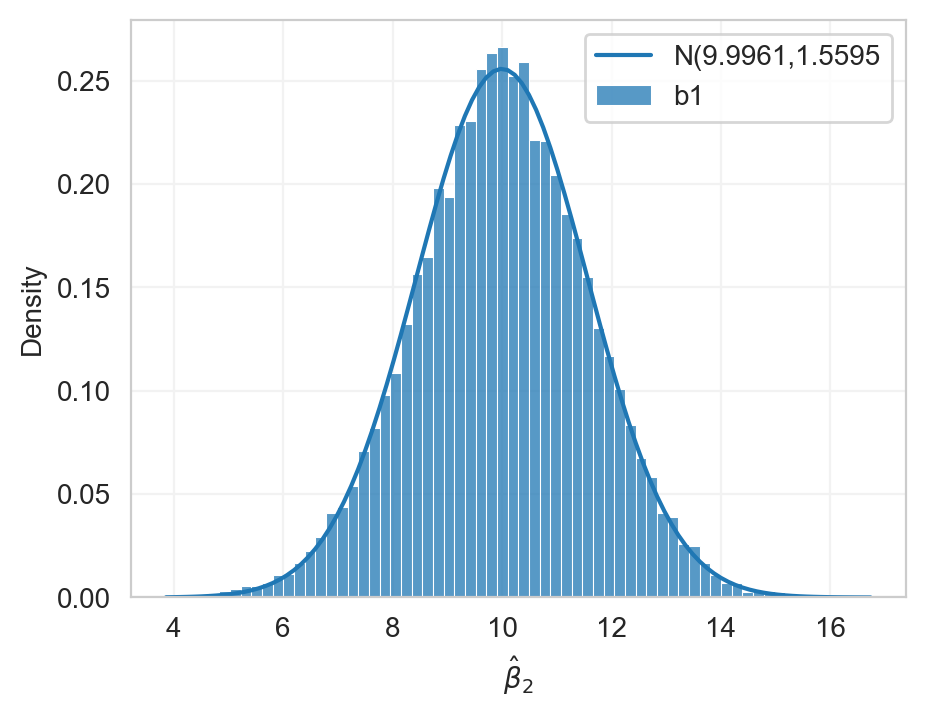

In [49]:
fig, ax = plt.subplots()
sns.histplot(b1,stat='density',label="b1")
ax.set_xlabel(r"$\hat\beta_2$")
ax.set_ylabel("Density")
x0 = np.linspace(min(b1),max(b1),100)
ax.plot(x0, st.norm.pdf(x0, np.mean(b1), np.mean(se_b1)),
        label=f"N({np.mean(b1):.4f},{np.mean(se_b1):.4f}")
ax.legend();

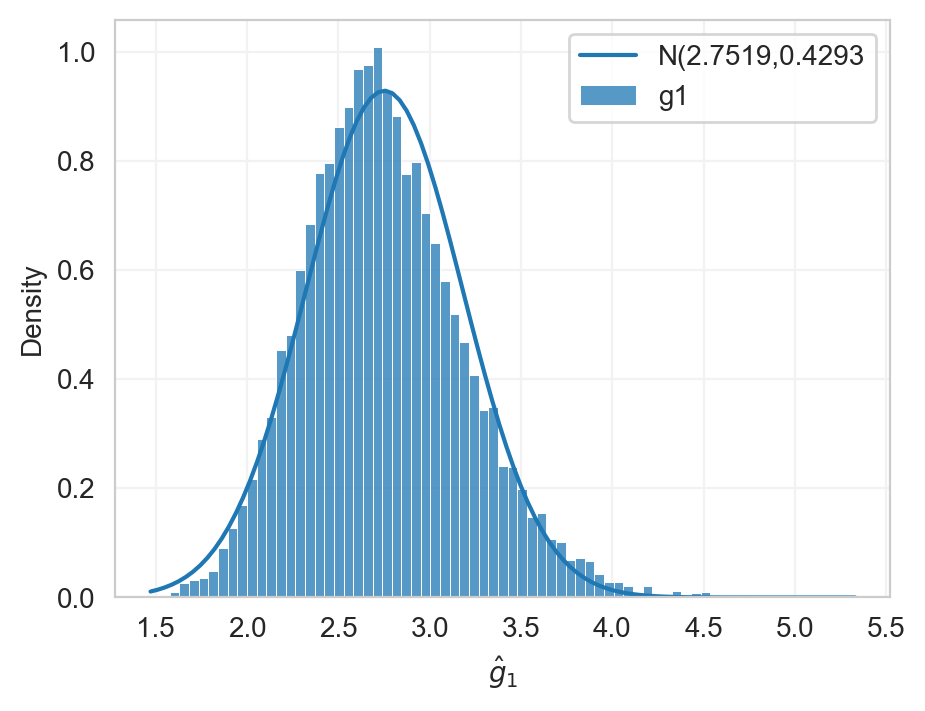

In [50]:
fig, ax = plt.subplots()
sns.histplot(g1,stat='density',label="g1")
ax.set_xlabel(r"$\hat g_1$")
ax.set_ylabel("Density")
x0 = np.linspace(min(g1),max(g1),100)
ax.plot(x0, st.norm.pdf(x0, np.mean(g1), np.mean(se_g1)),
        label=f"N({np.mean(g1):.4f},{np.mean(se_g1):.4f}")
ax.legend();

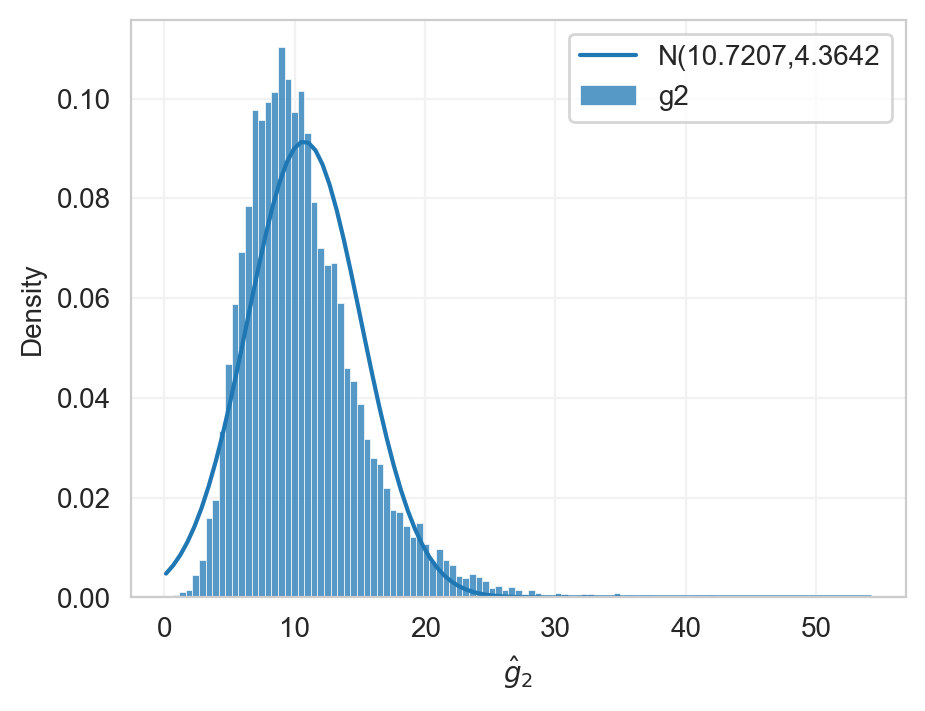

In [51]:
fig, ax = plt.subplots()
sns.histplot(g2,stat='density',label="g2")
ax.set_xlabel(r"$\hat g_2$")
ax.set_ylabel("Density")
x0 = np.linspace(min(g2),max(g2),100)
ax.plot(x0, st.norm.pdf(x0, np.mean(g2), np.mean(se_g2)),
        label=f"N({np.mean(g2):.4f},{np.mean(se_g2):.4f}")
ax.legend();